In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))


In [2]:
df=pd.read_csv("netflix_titles.csv")
#df=pd.read_csv('/content/netflix_titles.csv')

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6044,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6045,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6046,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6047,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [4]:
df["date_added"]= pd.to_datetime(df['date_added'])
df["month_added"] = df['date_added'].dt.month
df["year_added"] = df['date_added'].dt.year

df['movie_duration'] = df.apply(lambda x : x ['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis=1)
df['season_count'] = df.apply(lambda x: x ['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis=1)

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,movie_duration,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9.0,2019.0,90,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9.0,2016.0,94,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9.0,2018.0,,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,9.0,2018.0,,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,9.0,2017.0,99,


### Number of Movies and TV Shows

In [6]:
temp_type=df['type'].value_counts().reset_index()
temp_type

trace=go.Bar(x=temp_type['index'],
             y=temp_type['type'],
             marker=dict(color='rgb(31, 119, 180)',
             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template="plotly_dark",title='Number of Movies and TV Shows',xaxis=dict(title='Type'),yaxis=dict(title='Count'))
fig=go.Figure(data=[trace],layout=layout)
fig.show()

In [7]:
temp_type['index']

0      Movie
1    TV Show
Name: index, dtype: object

In [8]:
temp_type['type']

0    4118
1    1931
Name: type, dtype: int64

### Count Of Shows as Per Rating

In [9]:
temp_rating = df['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Scatter(
                x = temp_rating['index'],
                y = temp_rating['rating'],
                marker = dict(color = 'rgb(214,39,40)',
                              line=dict(color='rgb(148, 103, 189)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Count Of Shows as Per Rating' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [10]:
temp_rating['rating']

0     1992
1     1677
2      697
3      461
4      244
5      218
6      165
7      162
8      148
9      140
10      94
11      32
12       7
13       2
Name: rating, dtype: int64

### Content wise rating

In [11]:
tv    = df[df["type"]=="TV Show"]
movie = df[df["type"]=="Movie"]

temp_tv     = tv['rating'].value_counts().reset_index()
temp_movie  = movie['rating'].value_counts().reset_index()

# create trace1
tv_trace = go.Bar(
                x = temp_tv['index'],
                y = temp_tv['rating'],
                name="TV Shows",  
                marker = dict(color = 'rgb(255, 127, 14)',
                              line=dict(color='rgb(31, 119, 180)',width=2.0)))

movie_trace = go.Bar(
                x = temp_movie['index'],
                y = temp_movie['rating'],
                name="Movies",
                marker = dict(color = 'rgb(127, 127, 127)',
                              line=dict(color='rgb(31, 119, 180)',width=2.0)))


layout = go.Layout(template= "plotly_dark",title = 'Content wise Rating' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [tv_trace,movie_trace], layout = layout)
fig.show()

### Content added as per years

In [12]:
df1 = df[df["type"]=="TV Show"]
df2 = df[df["type"]=="Movie"]

column = "year_added"

tv_year = df1[column].value_counts().reset_index()
tv_year = tv_year.rename(columns={column:"count","index":column})
tv_year = tv_year.sort_values(column)

movie_year = df2[column].value_counts().reset_index()
movie_year = movie_year.rename(columns={column:"count","index":column})
movie_year = movie_year.sort_values(column)

tv_trace = go.Scatter(
                    x=tv_year[column], 
                    y=tv_year["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(255, 127, 14)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

movie_trace = go.Scatter(
                    x=movie_year[column], 
                    y=movie_year["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(148, 103, 189)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added as per years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count of Content'),template= "plotly_dark")
fig = go.Figure(data = [tv_trace, movie_trace], layout=layout)
fig.show()

### Content released over the year

In [13]:
temp_release = df['release_year'].value_counts().reset_index()


# create trace1
trace_release = go.Bar(
                x = temp_release['index'],
                y = temp_release['release_year'],
                marker = dict(color = 'rgb(31, 119, 180)',
                              line=dict(color='rgb(148, 103, 189)',width=0.75)))
layout = go.Layout(template= "plotly_dark",title = 'Content released over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace_release], layout = layout)
fig.show()

### TV Shows released over the year

In [14]:
tv = df[df['type']=="TV Show"]

tv_col = "release_year"

temp_tv = tv[tv_col].value_counts().reset_index()
temp_tv = temp_tv.rename(columns = {tv_col : "count", "index" : tv_col})
temp_tv = temp_tv.sort_values(tv_col)

trace_tv = go.Scatter(
                      x = temp_tv[tv_col],
                      y = temp_tv['count'],
                   name = "TV Shows",
                 marker = dict(color='rgb(148, 103, 189)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template="plotly_dark",hovermode= 'closest', title = 'TV Shows Released over years',
                  xaxis = dict(title='Year'), yaxis = dict(title='Count'))
fig = go.Figure(data = [trace_tv], layout = layout)
fig.show()

### Movies Released Over Years

In [15]:
moive = df[df['type']=="Movies"]

movie_col = "release_year"

temp_movie = movie[movie_col].value_counts().reset_index()
temp_movie = temp_movie.rename(columns = {movie_col : "count", "index" : movie_col})
temp_movie = temp_movie.sort_values(tv_col)

trace_movie = go.Scatter(
                      x = temp_movie[movie_col],
                      y = temp_movie['count'],
                   name = "Movie",
                 marker = dict(color='rgb(188, 189, 34)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template="plotly_dark",hovermode= 'closest', title = 'Movies Released over years',
                  xaxis = dict(title='Year'), yaxis = dict(title='Count'))
fig = go.Figure(data = [trace_movie], layout = layout)
fig.show()

### Top 10 Countries with most content

In [16]:
temp_country = df['country'].value_counts().reset_index()[:10]
temp_country = temp_country.sort_values('country')

# create trace1
trace_country = go.Bar(
                y = temp_country['index'],
                x = temp_country['country'],orientation='h',
                marker = dict(color = 'rgb(23, 190, 207)',
                              line=dict(color='rgb(188, 189, 34)',width=2.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 Cuntries With Most Content' , 
                  xaxis = dict(title = 'Count'), yaxis = dict(title = 'Countries'))
fig = go.Figure(data = [trace_country],layout=layout)
fig.show()

### Top 10 Genres on Netflix

In [17]:
temp_genre = df['listed_in'].value_counts().reset_index()[:10]
temp_genre = temp_genre.sort_values('listed_in')

# create trace1
trace_genre = go.Bar(
                y = temp_genre['index'],
                x = temp_genre['listed_in'],orientation='h',
                marker = dict(color = 'rgb(188, 189, 34)',
                              line=dict(color='rgb(31, 119, 180)',width=2.5)))
layout = go.Layout(template= "plotly_dark",title = 'Top 10 Genres on Netflix' , 
                  xaxis = dict(title = 'Count'), yaxis = dict(title = 'Genre'))
fig = go.Figure(data = [trace_genre],layout=layout)
fig.show()

### Distribution of Movies Duration

In [18]:
duration_trace = go.Histogram(
                              x = df['movie_duration'],
                          xbins = dict(size=0.5), marker = dict(color = 'rgb(148, 103, 189)'))
layout = go.Layout(template = "plotly_dark",title = 'Distribution of Movies Duration' , 
                   xaxis = dict(title = 'Minutes'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [duration_trace],layout=layout)
fig.show()

### Oldest Movies on Netflix

In [19]:
old = df.sort_values("release_year", ascending = True)
old = old[old['duration'] != ""]
display(old[['title', "release_year", 'listed_in','country','director']][:5])

,title,release_year,listed_in,country,director
4117,Pioneers: First Women Filmmakers*,1925,TV Shows,NaN,NaN
2012,The Battle of Midway,1942,"Classic Movies, Documentaries",United States,John Ford
2010,Prelude to War,1942,"Classic Movies, Documentaries",United States,Frank Capra
2025,WWII: Report from the Aleutians,1943,Documentaries,United States,John Huston
2022,Why We Fight: The Battle of Russia,1943,Documentaries,United States,"Frank Capra, Anatole Litvak"


### Oldest TV Show on Netflix

In [20]:
oldest_tv_show = df.sort_values("release_year", ascending = True)
oldest_tv_show = oldest_tv_show[oldest_tv_show['season_count'] != ""]
display(oldest_tv_show[['title', "release_year", 'listed_in','country']][:5])

,title,release_year,listed_in,country
4117,Pioneers: First Women Filmmakers*,1925,TV Shows,NaN
3904,Pioneers of African-American Cinema,1946,TV Shows,United States
5806,The Twilight Zone (Original Series),1963,"Classic & Cult TV, TV Sci-Fi & Fantasy",United States
5805,The Andy Griffith Show,1967,"Classic & Cult TV, TV Comedies",United States
5529,Star Trek,1968,"Classic & Cult TV, TV Action & Adventure, TV S...",United States


### Word cloud of titles

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

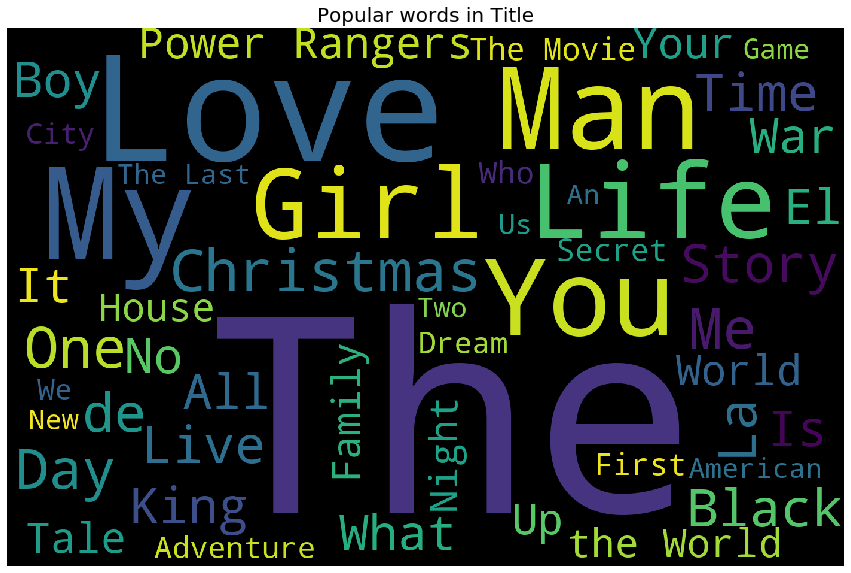

In [22]:
plt.subplots(figsize=(15,20))

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black',
                     width = 1400, height = 900,max_words = 50).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular words in Title',fontsize=20)
plt.show()

### Popular Directors

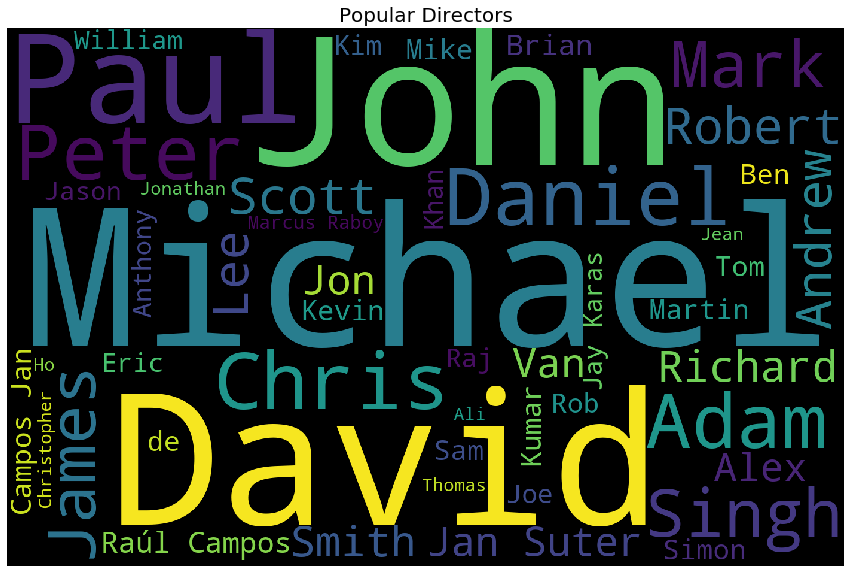

In [23]:
plt.subplots(figsize=(15,20))

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black',
                     width = 1400, height = 900,max_words = 50).generate(" ".join(map(str, df['director'].fillna(""))))

#values = ",".join(map(str, value_list))


plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular Directors',fontsize=20)
plt.show()

### Popular Cast

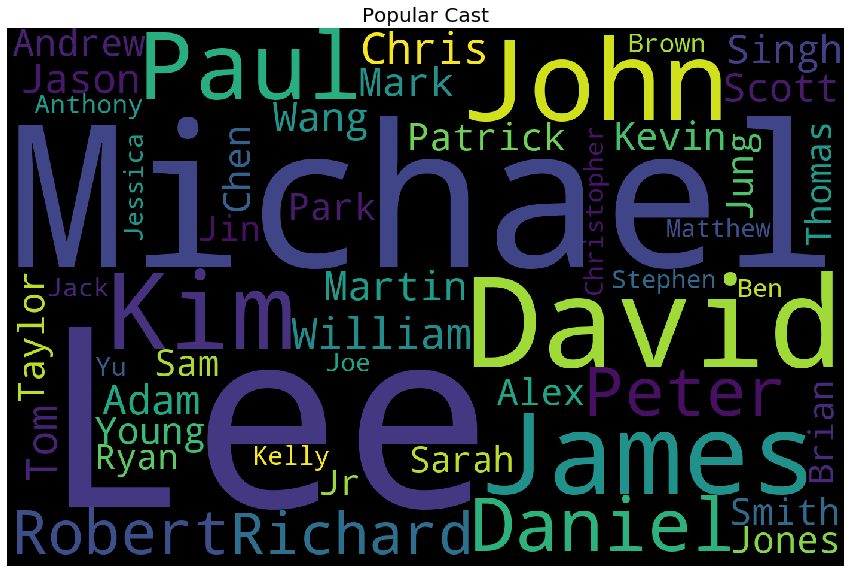

In [24]:
plt.subplots(figsize=(15,20))

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black',
                     width = 1400, height = 900,max_words = 50).generate(" ".join(map(str, df['cast'].fillna(""))))

#values = ",".join(map(str, value_list))


plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular Cast',fontsize=20)
plt.show()

### Top 10 Movies Directors With Most Content

In [25]:
from collections import Counter
temp_dir = df[df['type']=='Movie']

category = ", ".join(temp_dir['director'].fillna("")).split(", ")
counter_category = Counter(category).most_common(11)
counter_category = [_ for _ in counter_category if _[0] != ""]
labels = [_[0] for _ in counter_category][::-1]
values = [_[1] for _ in counter_category][::-1]

trace_dir = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = 'rgb(188, 189, 34)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Top 10 Movies Directors With Most Content' , xaxis = dict(title = 'Directors'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace_dir], layout = layout)
fig.show()

# Content Based Movie Recommendation

## Clean the Data

In [26]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
new= df[['title','director','cast','listed_in','description']]
new.head()

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...


In [28]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
new.dropna(inplace=True)

blanks = []  # start with an empty list

column=['type''title','director','cast','listed_in','description']
for i,column in new.iterrows():  # iterate over the DataFrame
    if type(column)==str:            # avoid NaN values
        if column.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

new.drop(blanks, inplace=True)

In [29]:
new['Key_words'] = ""

for index, row in new.iterrows():
    description = row['description']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(description)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict.keys())

# dropping the Plot column
new.drop(columns = ['description'], inplace = True)

In [30]:
# discarding the commas between the actors' full names and getting only the first three names
new['cast'] = new['cast'].map(lambda x: x.split(',')[:3])

# putting the genres in a list of words
new['listed_in'] = new['listed_in'].map(lambda x: x.lower().split(','))

new['director'] = new['director'].map(lambda x: x.split(' '))

# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in new.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['director'] = ''.join(row['director']).lower()

In [31]:
new.set_index('title', inplace = True)
new.head()

,director,cast,listed_in,Key_words
title,,,,
Norm of the North: King Sized Adventure,"richardfinn,timmaltby","[alanmarriott, andrewtoth, briandobson]","[children & family movies, comedies]","[polar, bear, king, must, take, back, planning..."
#realityhigh,fernandolebrija,"[nestacooper, katewalsh, johnmichaelhiggins]",[comedies],"[nerdy, high, schooler, dani, finally, attract..."
Automata,gabeibáñez,"[antoniobanderas, dylanmcdermott, melaniegriff...","[international movies, sci-fi & fantasy, thr...","[tech, company, investigates, violating, proto..."
Fabrizio Copano: Solo pienso en mi,"rodrigotoro,franciscoschultz",[fabriziocopano],[stand-up comedy],"[reflecting, family, whatsapp, groups, set, ne..."
Good People,henrikrubengenz,"[jamesfranco, katehudson, tomwilkinson]","[action & adventure, thrillers]","[recently, murdered, struggling, couple, neigh..."


In [32]:
new['bag_of_words'] = ''
columns = new.columns
for index, row in new.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
new.drop(columns = [col for col in new.columns if col!= 'bag_of_words'], inplace = True)

In [33]:
new.head()

,bag_of_words
title,
Norm of the North: King Sized Adventure,"richardfinn,timmaltby alanmarriott andrewtoth ..."
#realityhigh,fernandolebrija nestacooper katewalsh johnmich...
Automata,gabeibáñez antoniobanderas dylanmcdermott mela...
Fabrizio Copano: Solo pienso en mi,"rodrigotoro,franciscoschultz fabriziocopano st..."
Good People,henrikrubengenz jamesfranco katehudson tomwilk...


### Feature Extraction and Modeling

In [34]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(new['bag_of_words'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(new.index)
indices[:5]

0    Norm of the North: King Sized Adventure
1                               #realityhigh
2                                   Automata
3         Fabrizio Copano: Solo pienso en mi
4                                Good People
Name: title, dtype: object

In [35]:
# generating the cosine similarity matrix
cosine = cosine_similarity(count_matrix, count_matrix)
cosine

array([[1.        , 0.04454354, 0.04166667, ..., 0.        , 0.        ,
        0.03450328],
       [0.04454354, 1.        , 0.        , ..., 0.        , 0.03253   ,
        0.03688556],
       [0.04166667, 0.        , 1.        , ..., 0.03311331, 0.03042903,
        0.03450328],
       ...,
       [0.        , 0.        , 0.03311331, ..., 1.        , 0.31437304,
        0.38388595],
       [0.        , 0.03253   , 0.03042903, ..., 0.31437304, 1.        ,
        0.32756921],
       [0.03450328, 0.03688556, 0.03450328, ..., 0.38388595, 0.32756921,
        1.        ]])

In [36]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommend(Title, cosine = cosine):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(new.index)[i])
        
    return recommended_movies

In [37]:
recommend('PK')

['Merku Thodarchi Malai',
 '3 Idiots',
 'ROMA',
 'Harishchandrachi Factory',
 'I Am',
 'Ek Main Aur Ekk Tu',
 'Dil Chahta Hai',
 'Three-Quarters Decent',
 'Rang De Basanti',
 'Singapore']

In [38]:
recommend('Rocky')

['Rocky III',
 'Rocky II',
 'Rocky IV',
 'Rocky V',
 "Logan's Run",
 'Indiana Jones and the Last Crusade',
 'Don',
 'Thong Dee Fun Khao',
 'Arjun: The Warrior Prince',
 'The Bleeder']

In [39]:
recommend('Bad Boys')

['Bad Boys II',
 'Kung Fu Yoga',
 'War on Everyone',
 'Merantau',
 'Bon Cop Bad Cop 2',
 'Men in Black II',
 'Hellboy',
 'Hera Pheri',
 'The Do-Over',
 'Free Fire']

In [40]:
recommend('Love')

['Luck by Chance',
 'Swami',
 'The Rehearsal',
 'Kabir Singh',
 'Cities of Last Things',
 'Lens',
 'Taramani',
 'Atlantics',
 'Estar o no estar',
 'Familiye']

In [41]:
recommend('Sacred Games')

['Jack Taylor',
 'The Fear',
 'Innocent',
 'Bitter Daisies',
 'La Viuda Negra',
 'Black Money Love',
 'Father Brown',
 'You',
 'Criminal: Spain',
 'Sadqay Tumhare']

In [42]:
recommend('Article 15')

['Freedom at Midnight',
 'Kacche Dhaagey',
 'Manusangada',
 'Phamous',
 'I Am',
 'W/O Ram',
 'Singapore',
 'Brij Mohan Amar Rahe',
 'Vanjagar Ulagam',
 'Ittefaq']

In [43]:
recommend('Automata')

['The Worthy',
 'IBOY',
 'Anon',
 'Apollo 18',
 'Into the Forest',
 'Sweetheart',
 'F.R.E.D.I.',
 'Bhavesh Joshi Superhero',
 'The Congress',
 'I Am Mother']

In [44]:
recommend('The Five')

['Innocent',
 'London Spy',
 'Father Brown',
 'The Fear',
 'Jack Taylor',
 'You',
 'Crime Diaries: Night Out',
 'Reply 1997',
 'Call the Midwife',
 'Leyla and Mecnun']